In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#data loading
alldata = pd.read_csv('data/medications.csv')
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442105 entries, 0 to 442104
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   START              442105 non-null  object 
 1   STOP               423034 non-null  object 
 2   PATIENT            442105 non-null  object 
 3   PAYER              442105 non-null  object 
 4   ENCOUNTER          442105 non-null  object 
 5   CODE               442105 non-null  int64  
 6   DESCRIPTION        442105 non-null  object 
 7   BASE_COST          442105 non-null  float64
 8   PAYER_COVERAGE     442105 non-null  float64
 9   DISPENSES          442105 non-null  int64  
 10  TOTALCOST          442105 non-null  float64
 11  REASONCODE         391880 non-null  float64
 12  REASONDESCRIPTION  391880 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 43.8+ MB


In [ ]:
#data cleaning
alldata.drop(columns=['REASONCODE', 'REASONDESCRIPTION'], inplace= True)


In [18]:
#analysis

#financial analysis
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])*100


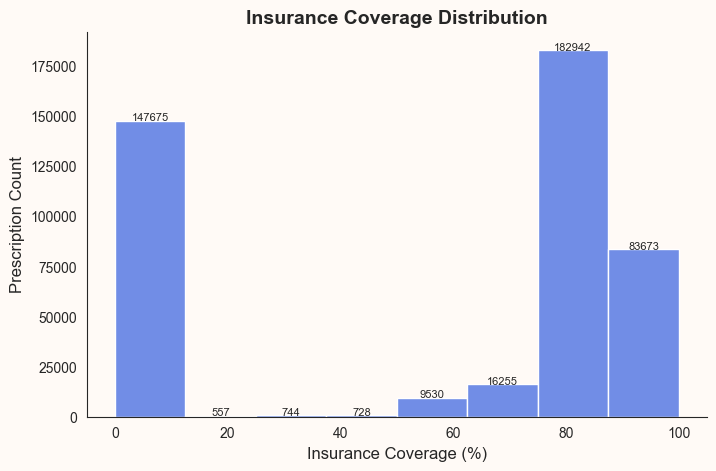

In [ ]:
#insurance coverage plot

plt.figure(figsize=(8, 5), facecolor='#FFFAF6')
ax = sns.histplot(alldata['COVERAGE_RATIO'],bins=8,color="royalblue", stat='count')
ax.set_facecolor('#FFFAF6')

plt.xlabel("Insurance Coverage (%)", fontsize=12)
plt.ylabel("Prescription Count", fontsize=12)
plt.title("Insurance Coverage Distribution", fontsize=14, fontweight="bold")

for p in ax.patches:
    height = p.get_height()
    if height > 500:  # Only label bars with data
        plt.text(p.get_x() + p.get_width() / 2, height + 1,  
                 f"{int(height)}", ha="center", fontsize=8, fontweight="light")

sns.despine()
plt.show()


In [70]:
zero_coverage = alldata[alldata['COVERAGE_RATIO']<20]
eighty_coverage = alldata[(alldata['COVERAGE_RATIO']>=79) & (alldata['COVERAGE_RATIO'] < 81)]
full_coverage = alldata[(alldata['COVERAGE_RATIO'] >= 99)]

print("0 cover medication: ",zero_coverage['DESCRIPTION'].value_counts().head(10))
print("\n\n")
print("80% cover medication: ",eighty_coverage['DESCRIPTION'].value_counts().head(10))


0 cover medication:  DESCRIPTION
Hydrochlorothiazide 25 MG Oral Tablet                                                                    24601
1 ML Epoetin Alfa 4000 UNT/ML Injection [Epogen]                                                         23192
lisinopril 10 MG Oral Tablet                                                                             22278
amLODIPine 2.5 MG Oral Tablet                                                                            20321
insulin isophane  human 70 UNT/ML / insulin  regular  human 30 UNT/ML Injectable Suspension [Humulin]     9529
sodium fluoride 0.0272 MG/MG Oral Gel                                                                     7425
Acetaminophen 325 MG Oral Tablet [Tylenol]                                                                2239
Ibuprofen 400 MG Oral Tablet [Ibu]                                                                        2210
Acetaminophen 300 MG / Hydrocodone Bitartrate 5 MG Oral Tablet                 